### 작성일 : 19/08/05
### 목적 : 데이터에서 같은 client 데이터를 찾아 grouping 할 수 있을까?

만약 card1이 client id라는 내 가설이 맞다면, 어떻게 증명할 수 있을까?


In [31]:
library(data.table)
library(ggplot2)
library(dplyr)
options(repr.plot.width = 5, repr.plot.height = 3)
options(scipen = 100)
library(ggpubr)

In [32]:
tr <- fread("/Users/jeong/downloads/IEEE/input/train_transaction.csv")
te <- fread("/Users/jeong/downloads/IEEE/input/test_transaction.csv")

In [37]:
card1_id <- tr[, .N , by= card1]
card1_id  <- card1_id[order(-N)]

In [39]:
card1_id$card1[1]

[1] 7919

In [48]:
ex <- tr[card1 == card1_id$card1[2]]

In [49]:
head(ex[,16:30],50)

P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
aol.com,,3,3,0,0,0,2,0,0,1,0,2,0,8
,,21,25,0,0,33,22,0,0,17,0,19,0,99
gmail.com,,1,1,0,0,4,1,0,0,1,0,1,0,5
gmail.com,,3,3,0,0,7,1,0,0,2,0,2,0,31
aol.com,,2,1,0,0,0,1,0,0,2,0,1,0,7
hotmail.com,,1,1,0,0,0,1,0,0,1,0,1,0,1
gmail.com,anonymous.com,1,1,0,1,0,1,0,1,0,1,1,0,0
gmail.com,anonymous.com,1,1,0,1,0,1,0,1,0,1,1,0,0
gmail.com,anonymous.com,1,1,0,1,0,1,0,1,0,1,1,0,0


In [50]:
te$isFraud <- -1
tt <- rbind(tr, te)

In [51]:
tt$day <-round(tt$TransactionDT / 60 / 60/ 24, 0)

In [82]:
tt$type <- ifelse(tt$isFraud == '-1', 'test','train')

In [87]:
ex <- tt[sample(nrow(tt), round(nrow(tt)/20)), ]

Warning message:
“Removed 4466 rows containing missing values (geom_point).”

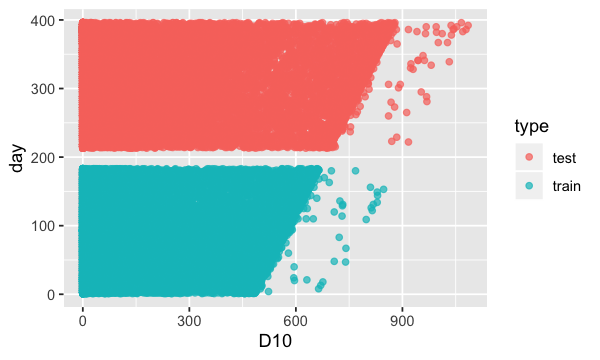

In [90]:
ggplot(ex, aes(D10, day, color = type)) + geom_point(alpha = .7)

Warning message:
“Removed 1 rows containing missing values (geom_point).”

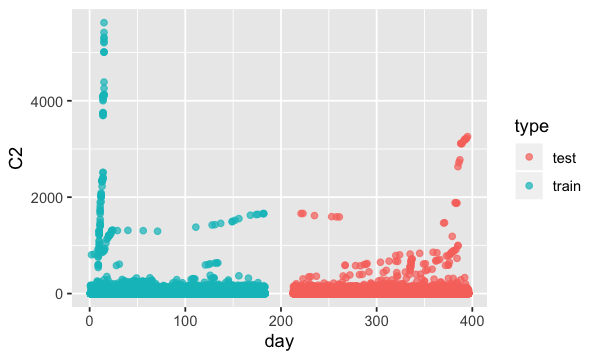

In [100]:
ggplot(ex, aes(day, C2, color = type)) + geom_point(alpha = .7)